In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_cleaning_df_2.csv', parse_dates = ['date'])

In [3]:
sns.set(style='ticks')

In [4]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,stringency_index,excess_mortality
count,6.784900e+04,6.781000e+04,63638.000000,63606.000000,67849.000000,67810.000000,63638.000000,63606.000000,67271.000000,5071.000000
mean,8.451609e+05,3.330005e+03,21689.842955,69.123353,35046.570070,152.112550,679.180934,2.318273,55.934987,15.983599
std,3.240124e+06,1.393774e+04,69072.302455,235.050082,43655.829735,326.472526,839.151384,4.977289,19.912050,30.661280
min,1.000000e+00,-7.434700e+04,1.000000,-1918.000000,0.003000,-3125.829000,0.003000,-75.911000,0.000000,-95.920000
25%,4.984000e+03,1.300000e+01,125.000000,0.000000,1476.500000,3.476000,38.077750,0.000000,42.130000,-0.475000
50%,9.095800e+04,3.050000e+02,1822.000000,5.000000,14856.588000,43.072500,333.690000,0.513000,56.480000,7.140000
75%,4.647500e+05,1.692000e+03,11615.000000,33.000000,59153.688000,169.108750,1078.667250,2.511000,71.300000,22.000000
max,5.618955e+07,1.082549e+06,827748.000000,4442.000000,316751.558000,11681.617000,6079.783000,176.419000,100.000000,374.340000


In [5]:
locations = df['location'].unique()
print(locations)

['Albania' 'Andorra' 'Argentina' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Bermuda' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria' 'Canada' 'Chile'
 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Faeroe Islands' 'Finland' 'France' 'Georgia' 'Germany' 'Greece'
 'Greenland' 'Guatemala' 'Hong Kong' 'Hungary' 'Iceland' 'Iran' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kosovo'
 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Macao' 'Malaysia' 'Malta' 'Mauritius' 'Mexico' 'Moldova'
 'Monaco' 'Mongolia' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Palestine' 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Qatar' 'Romania' 'Russia' 'San Marino' 'Serbia' 'Seychelles'
 'Singapore' 'Slovakia' 'Slovenia' 'South Africa' 'South Korea' 'Spain'
 'Sweden' 'Switzerlan

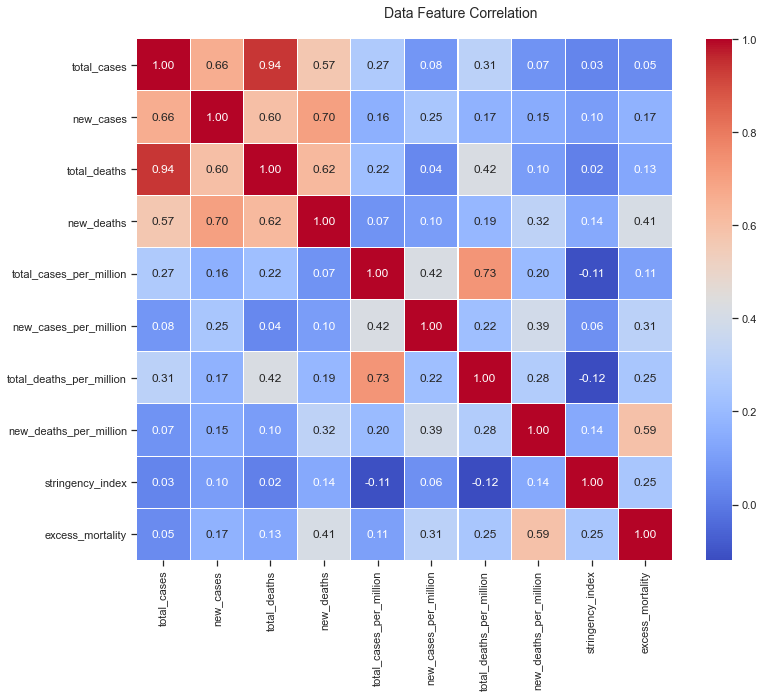

In [6]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Data Feature Correlation', fontsize=14)

### Strong Correlations:
Total Deaths, Total Cases: 0.94
New Deaths, New Cases: 0.78
Total_Cases_Per_Million: 0.74

Moderate Correlations:
New Cases, Total Cases: 0.68
Total Deaths, New Cases: 0.65
New Deaths Per Million, Excess Mortality: 0.59
New Deaths, Total Deaths:0.64
New Deaths, Total Cases: 0.58

Stringency, interestingly, seems relatively weekly correlated to anything at all, with 0.29 correlations with excess mortality being the strongest effect.

<AxesSubplot:xlabel='date', ylabel='excess_mortality'>

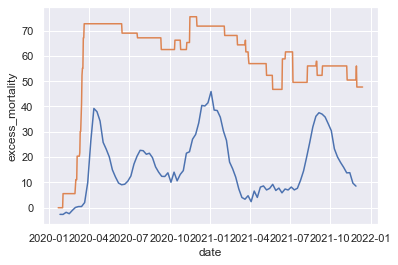

In [7]:
sns.set_style("darkgrid")
sns.lineplot(data=df[df['location']=='United States'], x='date', y='excess_mortality')
sns.lineplot(data=df[df['location']=='United States'], x='date', y='stringency_index')

<AxesSubplot:xlabel='date', ylabel='excess_mortality'>

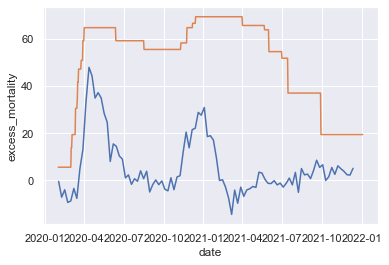

In [8]:
sns.lineplot(data=df[df['location']=='Sweden'], x='date', y='excess_mortality')
sns.lineplot(data=df[df['location']=='Sweden'], x='date', y='stringency_index')

<AxesSubplot:xlabel='date', ylabel='excess_mortality'>

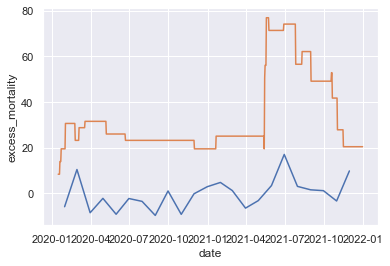

In [9]:
sns.lineplot(data=df[df['location']=='Taiwan'], x='date', y='excess_mortality')
sns.lineplot(data=df[df['location']=='Taiwan'], x='date', y='stringency_index')

<AxesSubplot:xlabel='date', ylabel='excess_mortality'>

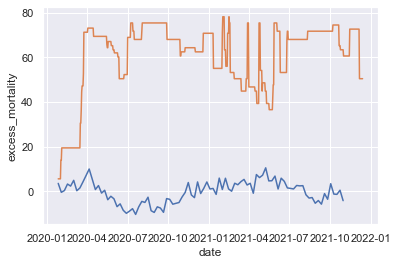

In [10]:
sns.lineplot(data=df[df['location']=='Australia'], x='date', y='excess_mortality')
sns.lineplot(data=df[df['location']=='Australia'], x='date', y='stringency_index')

<AxesSubplot:xlabel='date', ylabel='excess_mortality'>

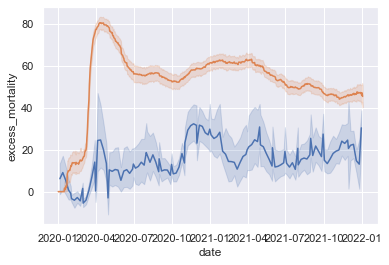

In [11]:
sns.lineplot(data=df, x='date', y='excess_mortality')
sns.lineplot(data=df, x='date', y='stringency_index')

In [12]:
toughest = {}
for i in locations:
    toughest[i] = df['stringency_index'].loc[df['location']== i].mean()

In [13]:
print(toughest)

{'Albania': 56.18644873699851, 'Andorra': 48.62347560975603, 'Argentina': 70.46415384615315, 'Aruba': 47.8884301412872, 'Australia': 60.83889695210467, 'Austria': 60.76686303387325, 'Azerbaijan': 70.05653495440735, 'Barbados': 59.766506211179454, 'Belarus': 32.3566565809378, 'Belgium': 54.63881428571423, 'Belize': 67.61666666666707, 'Bermuda': 52.313119122257206, 'Bolivia': 55.51022658610246, 'Bosnia and Herzegovina': 46.8648955223877, 'Brazil': 63.41850152905201, 'Brunei': 49.3729803328296, 'Bulgaria': 47.8524079754603, 'Canada': 64.90788434414684, 'Chile': 70.20606606606574, 'Colombia': 67.9259298780494, 'Costa Rica': 60.46792944785257, 'Croatia': 46.05625920471276, 'Cuba': 70.67018489984612, 'Cyprus': 61.10332278480995, 'Czechia': 50.999475262368684, 'Denmark': 49.221894586894585, 'Dominican Republic': 67.27654302670611, 'Ecuador': 66.14712166172106, 'Egypt': 54.97640483383669, 'El Salvador': 52.295839753466346, 'Estonia': 39.31992857142865, 'Faeroe Islands': 37.7657663125946, 'Finl

In [14]:
sorted(toughest.items(), key=lambda x: x[1])

[('Nicaragua', 10.818059936908472),
 ('Macao', 30.025331412103487),
 ('Belarus', 32.3566565809378),
 ('Taiwan', 32.954567039105925),
 ('Faeroe Islands', 37.7657663125946),
 ('Estonia', 39.31992857142865),
 ('Greenland', 40.6423216995449),
 ('Iceland', 41.04023668639069),
 ('Japan', 41.88375876577862),
 ('Finland', 42.725198300283424),
 ('New Zealand', 42.916737804878125),
 ('Croatia', 46.05625920471276),
 ('Mauritius', 46.37161949685548),
 ('Bosnia and Herzegovina', 46.8648955223877),
 ('Bulgaria', 47.8524079754603),
 ('Aruba', 47.8884301412872),
 ('Luxembourg', 47.99355882352918),
 ('Liechtenstein', 48.13991044776115),
 ('Lithuania', 48.263763277693315),
 ('Andorra', 48.62347560975603),
 ('San Marino', 48.87642965204195),
 ('Denmark', 49.221894586894585),
 ('Norway', 49.37155555555554),
 ('Brunei', 49.3729803328296),
 ('Russia', 49.59854383358089),
 ('Sweden', 50.132162162162444),
 ('Latvia', 50.19635542168639),
 ('Singapore', 50.20476727785665),
 ('Switzerland', 50.47829881656809),
 

In [15]:
highest_mort = {}
for i in locations:
    highest_mort[i] = df['excess_mortality'].loc[df['location']== i].mean()

In [16]:
sorted(highest_mort.items(), key=lambda x: x[1])

[('Seychelles', -8.238125),
 ('Faeroe Islands', -7.875499999999998),
 ('Barbados', -3.466315789473686),
 ('New Zealand', -3.3267741935483888),
 ('Brunei', -3.1860000000000004),
 ('Greenland', -2.7331578947368427),
 ('Mauritius', -2.706875),
 ('Jamaica', -2.112222222222223),
 ('Taiwan', -0.36521739130434755),
 ('Australia', -0.2875268817204301),
 ('Macao', 0.0290909090909094),
 ('Dominican Republic', 0.13000000000000161),
 ('Japan', 0.2704545454545451),
 ('Iceland', 0.4225000000000009),
 ('Cuba', 0.509),
 ('South Korea', 1.0664516129032255),
 ('Denmark', 1.3439795918367339),
 ('Malaysia', 1.5495238095238097),
 ('Norway', 1.7394736842105265),
 ('Singapore', 2.050952380952381),
 ('Luxembourg', 2.747415730337079),
 ('Hong Kong', 2.776),
 ('Canada', 3.2425581395348826),
 ('Finland', 3.3251020408163265),
 ('Mongolia', 3.417142857142858),
 ('Ireland', 3.8766666666666665),
 ('Costa Rica', 4.1530000000000005),
 ('Germany', 5.063265306122448),
 ('Uruguay', 5.5085),
 ('Sweden', 5.687755102040818)

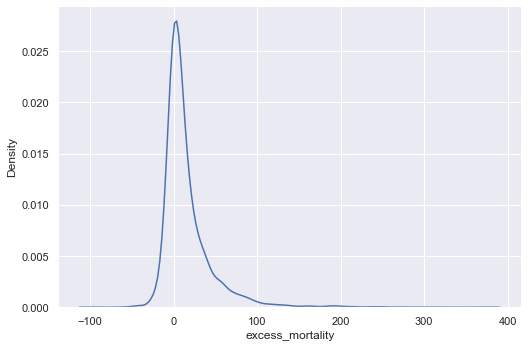

In [17]:
sns.displot(data=df, x="excess_mortality", kind='kde', aspect = 1.5)

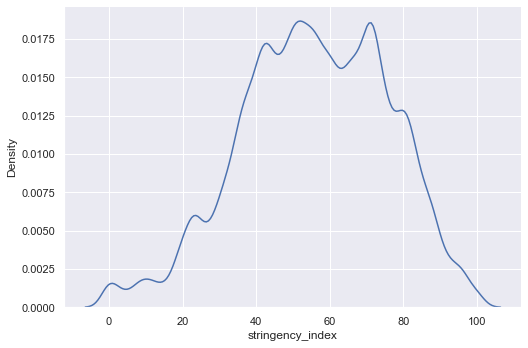

In [18]:
sns.displot(data=df, x="stringency_index", kind="kde", aspect = 1.5)

In [19]:
tough = df['stringency_index'].values
mort = df['excess_mortality'].values

In [23]:
plt(data=df, x=tough,y=mort, kind="kde", aspect = 1.5)

TypeError: 'module' object is not callable